# Data Structures and Algorithms--J component

## Maddukuri Nivas (19BCE1010)
## Kovvuri Uday Surya Deveswar Reddy (19BCE1253)

# Problem Statement:

we will be predicting the costs of used cars given the data collected from various sources and distributed across various locations in India.

# Features:

Name: The brand and model of the car.

Location: The location in which the car is being sold or is available for purchase.

Year: The year or edition of the model.

Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM.

Fuel_Type: The type of fuel used by the car.

Transmission: The type of transmission used by the car.

Owner_Type: Whether the ownership is Firsthand, Second hand or other.

Mileage: The standard mileage offered by the car company in kmpl or km/kg

Engine: The displacement volume of the engine in cc.

Power: The maximum power of the engine in bhp.

Seats: The number of seats in the car.

Price: The price of the used car in INR Lakhs.

# INTRODUCTION:

In this notebook we have analised the dataset with three different algorithms
1. Linear Regression Algorithm
2. Random Forest Tree Regression Algorithm
3. Decision Tree Algorithm
4. Support Vector Machines
5. Gradient Boosting Algorithm

# IMPORTING LIBS:

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import collections
from sklearn.metrics import r2_score
import re
from sklearn import ensemble
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
%matplotlib inline

# IMPORTING DATASET:

In [2]:
df_train = pd.read_excel("Data_Train.xlsx")

In [3]:
df_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


# CLEANING DATASET & MISSING VALUES:

#### Number of null row in columns

In [4]:
df_train.isna().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

#### Percentage of data missing

In [5]:
(df_train.isnull().sum() / len(df_train)) * 100

Name                 0.000000
Location             0.000000
Year                 0.000000
Kilometers_Driven    0.000000
Fuel_Type            0.000000
Transmission         0.000000
Owner_Type           0.000000
Mileage              0.033228
Engine               0.598106
Power                0.598106
Seats                0.697790
Price                0.000000
dtype: float64

#### Renaming columns of dataset

In [6]:
df_train.insert(0, 'id', range(0, 0 + len(df_train)))
df_train.head()

,id,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [7]:
df_train.isna().sum()

id                    0
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

### Seats Column

In [8]:
df_train.groupby('Seats')['id'].nunique()

Seats
0.0        1
2.0       16
4.0       99
5.0     5014
6.0       31
7.0      674
8.0      134
9.0        3
10.0       5
Name: id, dtype: int64

In [9]:
df_train['Seats'].mode()

0    5.0
dtype: float64

In [10]:
df_train["Seats"].fillna(value = 5.0, inplace=True)
df_train.Seats[df_train.Seats == 0.0] = 5.0
df_train.isna().sum()

id                    0
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                 0
Price                 0
dtype: int64

### Mileage Column

In [11]:
df_train.groupby('Mileage')['id'].nunique()

Mileage
0.0 kmpl      68
10.0 kmpl     10
10.1 kmpl      7
10.13 kmpl     3
10.2 kmpl      6
              ..
9.52 kmpl      2
9.7 kmpl       1
9.74 kmpl      2
9.8 kmpl       4
9.9 kmpl       3
Name: id, Length: 442, dtype: int64


#### *Removing the string part and converting to the float, Taking mode and will replace emply rows with mode* 

In [12]:


df_train.Mileage[df_train.Mileage == '0.0 kmpl'] = np.nan
df_train['Mileage'] = df_train['Mileage'].apply(lambda x: re.sub(r'(\d+\.\d+)\s(kmpl|km\/kg)', r'\1', str(x)))
df_train['Mileage'] = df_train['Mileage'].astype(float)
df_train['Mileage'].mode()

0    17.0
dtype: float64

In [13]:
df_train['Mileage'].fillna(value = 17.0, inplace = True)
df_train.isna().sum()

id                    0
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               36
Power                36
Seats                 0
Price                 0
dtype: int64

### Engine Column

In [14]:
df_train.groupby('Engine')['id'].nunique()

Engine
1047 CC      4
1061 CC     30
1086 CC    108
1120 CC     54
1150 CC      7
          ... 
970 CC       1
993 CC      14
995 CC      10
998 CC     259
999 CC      29
Name: id, Length: 146, dtype: int64

#### *Removing the string part and converting to the float, Taking mode and will replace emply rows with mode* 

In [15]:
df_train['Engine'] = df_train['Engine'].apply(lambda x: re.sub(r'(\d+)\s(CC)', r'\1', str(x)))
df_train['Engine'] = df_train['Engine'].astype(float)
df_train['Engine'].mode()

0    1197.0
dtype: float64

In [16]:
df_train['Engine'].fillna(value = 1197.0, inplace = True)
df_train.isna().sum()

id                    0
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine                0
Power                36
Seats                 0
Price                 0
dtype: int64

### Power Column

In [17]:
df_train['Power'] = df_train['Power'].str.split(' ').str[0]
# including nan rows there is data in this column of 'null' value
df_train.Power[df_train.Power == 'null'] = np.NaN
df_train['Power'].isnull().sum()

143

In [18]:
df_train['Power'] = df_train['Power'].astype(float)
df_train['Power'].mode()

0    74.0
dtype: float64

In [19]:
df_train['Power'].fillna(value = 74, inplace = True)
df_train.isna().sum()

id                   0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

### Name Column

In [20]:
df_train['Name'] = df_train['Name'].str.split(' ').str[0]
df_train.groupby('Name')['id'].nunique()

Name
Ambassador          1
Audi              236
BMW               267
Bentley             1
Chevrolet         121
Datsun             13
Fiat               28
Force               3
Ford              300
Honda             608
Hyundai          1107
ISUZU               2
Isuzu               1
Jaguar             40
Jeep               15
Lamborghini         1
Land               60
Mahindra          272
Maruti           1211
Mercedes-Benz     318
Mini               26
Mitsubishi         27
Nissan             91
Porsche            18
Renault           145
Skoda             173
Smart               1
Tata              186
Toyota            411
Volkswagen        315
Volvo              21
Name: id, dtype: int64

In [21]:
df_train.Name[df_train.Name == 'Isuzu'] = 'ISUZU'

In [22]:
df_train.head()

,id,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


### Data is for Visualizing with cleaned dataset

In [23]:
del df_train['id']

In [24]:
dataset = df_train.copy()

In [25]:
df_train.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

#### Converting datatypes from int to float

In [26]:
df_train['Year'] = df_train['Year'].astype(float)
df_train['Kilometers_Driven'] = df_train['Kilometers_Driven'].astype(float)

In [27]:
df_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010.0,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai,Pune,2015.0,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda,Chennai,2011.0,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti,Chennai,2012.0,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi,Coimbatore,2013.0,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [28]:
#### For improving the prediction values

df_train['Price_log'] = np.log1p(df_train['Price'].values)
del df_train['Price']

In [29]:
df_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price_log
0,Maruti,Mumbai,2010.0,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,1.011601
1,Hyundai,Pune,2015.0,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,2.602690
2,Honda,Chennai,2011.0,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,1.704748
3,Maruti,Chennai,2012.0,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,1.945910
4,Audi,Coimbatore,2013.0,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,2.930660


In [30]:
df_train =pd.get_dummies(df_train,columns=['Name'],prefix=['Name'])
df_train =pd.get_dummies(df_train,columns=['Location'],prefix=['Location'])
df_train =pd.get_dummies(df_train,columns=['Fuel_Type'],prefix=['Fuel_Type'])
df_train =pd.get_dummies(df_train,columns=['Transmission'],prefix=['Transmission'])
df_train =pd.get_dummies(df_train,columns=['Owner_Type'],prefix=['Owner_Type'])


print(df_train.head())

     Year  Kilometers_Driven  Mileage  Engine   Power  Seats  Price_log  \
0  2010.0            72000.0    26.60   998.0   58.16    5.0   1.011601   
1  2015.0            41000.0    19.67  1582.0  126.20    5.0   2.602690   
2  2011.0            46000.0    18.20  1199.0   88.70    5.0   1.704748   
3  2012.0            87000.0    20.77  1248.0   88.76    7.0   1.945910   
4  2013.0            40670.0    15.20  1968.0  140.80    5.0   2.930660   

   Name_Ambassador  Name_Audi  Name_BMW  ...  Fuel_Type_Diesel  \
0                0          0         0  ...                 0   
1                0          0         0  ...                 1   
2                0          0         0  ...                 0   
3                0          0         0  ...                 1   
4                0          1         0  ...                 1   

   Fuel_Type_Electric  Fuel_Type_LPG  Fuel_Type_Petrol  \
0                   0              0                 0   
1                   0              0

In [31]:
import datetime

x = datetime.datetime.now()

df_train['Year']=x.year-df_train['Year']
df_train['Year']

0       10.0
1        5.0
2        9.0
3        8.0
4        7.0
        ... 
6014     6.0
6015     5.0
6016     8.0
6017     7.0
6018     9.0
Name: Year, Length: 6019, dtype: float64

In [32]:
df_train.columns

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price_log', 'Name_Ambassador', 'Name_Audi', 'Name_BMW', 'Name_Bentley',
       'Name_Chevrolet', 'Name_Datsun', 'Name_Fiat', 'Name_Force', 'Name_Ford',
       'Name_Honda', 'Name_Hyundai', 'Name_ISUZU', 'Name_Jaguar', 'Name_Jeep',
       'Name_Lamborghini', 'Name_Land', 'Name_Mahindra', 'Name_Maruti',
       'Name_Mercedes-Benz', 'Name_Mini', 'Name_Mitsubishi', 'Name_Nissan',
       'Name_Porsche', 'Name_Renault', 'Name_Skoda', 'Name_Smart', 'Name_Tata',
       'Name_Toyota', 'Name_Volkswagen', 'Name_Volvo', 'Location_Ahmedabad',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_Type_CNG', 'Fuel_Type_Diesel',
       'Fuel_Type_Electric', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Automatic', 'Transmission_Manua

In [33]:
X = df_train[['Year',  'Engine', 'Power', 'Seats', 'Name_Audi', 'Name_BMW', 'Name_Chevrolet', 'Name_Datsun',
       'Name_Fiat', 'Name_Force', 'Name_Ford', 'Name_Honda', 'Name_Hyundai',
       'Name_ISUZU', 'Name_Jaguar', 'Name_Jeep', 'Name_Land', 'Name_Mahindra',
       'Name_Maruti', 'Name_Mercedes-Benz', 'Name_Mini', 'Name_Mitsubishi',
       'Name_Nissan', 'Name_Porsche', 'Name_Renault', 'Name_Skoda',
       'Name_Smart', 'Name_Tata', 'Name_Toyota', 'Name_Volkswagen',
       'Name_Volvo', 'Location_Ahmedabad', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune', 'Fuel_Type_CNG',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Automatic', 'Transmission_Manual',
       'Owner_Type_First', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third']]
y = df_train['Price_log']

### Splitting the data for training the model

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Random Forest Regressor Model

In [35]:
regr = RandomForestRegressor(max_depth=20, random_state=0, n_estimators=10)
regr.fit(X_train, y_train)
print('R-squared score (training): {:.3f}'
     .format(regr.score(X_train, y_train)))
print('R-squared score (testing): {:.3f}'
     .format(regr.score(X_test, y_test)))

R-squared score (training): 0.986
R-squared score (testing): 0.932


### predicting test set values

In [36]:
y_pred = regr.predict(X_test)
print(y_pred);

[2.21700654 1.47785114 1.62545259 ... 2.50062231 1.90864515 1.7904186 ]


### Visualizing actual results vs predicted results

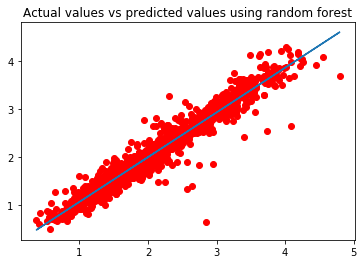

In [37]:
plt.scatter(y_test, y_pred, color='red')
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m*y_test + b)
plt.title('Actual values vs predicted values using random forest')
plt.show()

### Support Vector Machine Model

In [38]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [39]:
from sklearn.metrics import classification_report
regressor.score(X_test,y_test)

0.683128821493263

### Predicting test set values

In [40]:
y_pred = regressor.predict(X_test)
print(y_pred);

[2.48783871 1.58652453 1.96866888 ... 2.2411862  1.66746063 1.67121376]


### Visualizing actual results vs predicted results

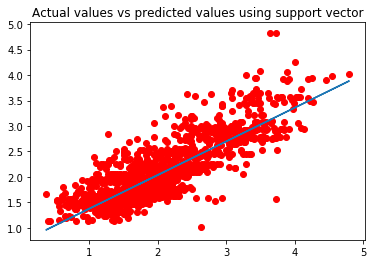

In [41]:
plt.scatter(y_test, y_pred, color='red')
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m*y_test + b)
plt.title('Actual values vs predicted values using support vector')
plt.show()

## Accuracy scores
.

#### Random Forest Regression - 93.56%


#### Support Vector Machine Regression - 68.3%
